In [6]:
# Import libraries for data handling, machine learning, and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kcH9QU5E3MCOMkVHCz9DuLXDCpBmoxjAzbzv0GXWbG5q',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'networkintrusiondetectionsystem-donotdelete-pr-ue1juuoy11pnsg'
object_key = 'Train_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train_df = pd.read_csv(body)
train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [9]:
# Get a summary of the data types and check for missing values
print("--- Data Info ---")
train_df.info()

# See the breakdown of 'normal' connections vs. 'anomaly' attacks
print("\n--- Attack Class Distribution ---")
print(train_df['class'].value_counts())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13

In [10]:
from sklearn.preprocessing import LabelEncoder

# Identify the columns that contain text data
categorical_cols = ['protocol_type', 'service', 'flag', 'class']

# Loop through each text column and convert its values into numbers
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])

# Display the first 5 rows again to see the result. All columns should now be numerical.
print("\n--- Data After Converting Text to Numbers ---")
train_df.head()


--- Data After Converting Text to Numbers ---


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [11]:
# X contains all the descriptive features of the network traffic.
X = train_df.drop('class', axis=1)

# y contains only the label we want to predict (0 for normal, 1 for anomaly).
y = train_df['class']

--- Training the model... This might take a minute. ---
--- Model training complete! ---

Model Accuracy: 99.78%

--- Detailed Classification Report ---
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      2365
     Anomaly       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039


--- Confusion Matrix ---


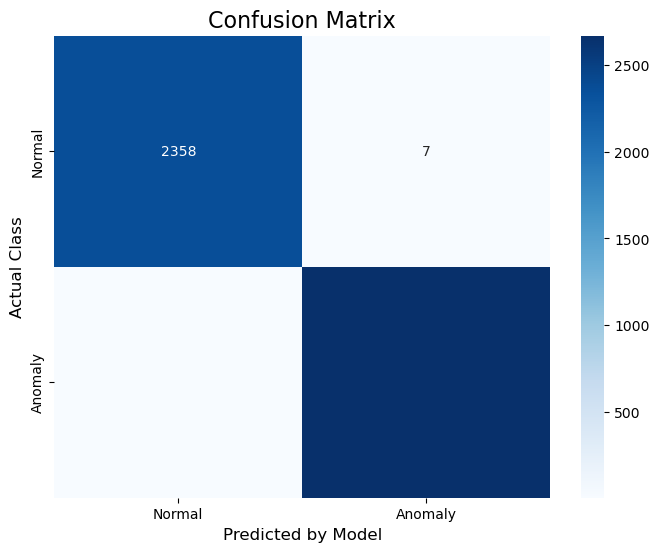

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split our data into a set for training the model and a set for testing it.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will use a RandomForestClassifier, which is powerful and great for this task.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data.
print("--- Training the model... This might take a minute. ---")
model.fit(X_train, y_train)
print("--- Model training complete! ---")

# Use our trained model to make predictions on the test data.
y_pred = model.predict(X_test)

# --- MODEL EVALUATION ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\n--- Detailed Classification Report ---")
# This report shows precision and recall. 0 = Normal, 1 = Anomaly.
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly']))

# Finally, let's visualize the results with a Confusion Matrix.
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted by Model', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.show()